In [1]:
import numpy as np
import keras


import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
x_train = np.loadtxt('input.csv', delimiter=',')
x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255
x_test = x_test/255

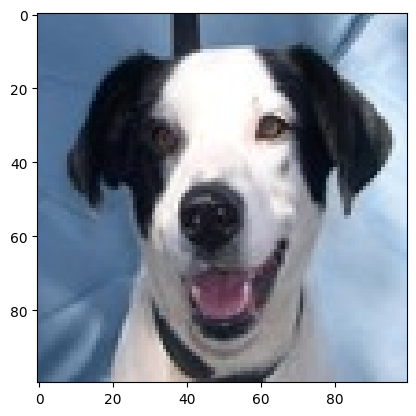

In [4]:
plt.imshow(x_train[122])

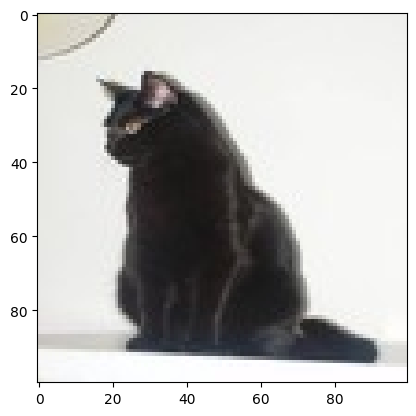

In [5]:
plt.imshow(x_train[1200])

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(1, activation="sigmoid")
])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))


In [7]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 70, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/70
63/63 [==============================] - 10s 26ms/step - loss: 0.6925 - accuracy: 0.5310 - val_loss: 0.6885 - val_accuracy: 0.5175
Epoch 2/70
63/63 [==============================] - 1s 14ms/step - loss: 0.6840 - accuracy: 0.5650 - val_loss: 0.6858 - val_accuracy: 0.5325
Epoch 3/70
63/63 [==============================] - 1s 14ms/step - loss: 0.6788 - accuracy: 0.5655 - val_loss: 0.6743 - val_accuracy: 0.5975
Epoch 4/70
63/63 [==============================] - 1s 13ms/step - loss: 0.6730 - accuracy: 0.5890 - val_loss: 0.6949 - val_accuracy: 0.5150
Epoch 5/70
63/63 [==============================] - 1s 13ms/step - loss: 0.6741 - accuracy: 0.5815 - val_loss: 0.6728 - val_accuracy: 0.5650
Epoch 6/70
63/63 [==============================] - 1s 13ms/step - loss: 0.6666 - accuracy: 0.6015 - val_loss: 0.6922 - val_accuracy: 0.5350
Epoch 7/70
63/63 [==============================] - 1s 13ms/step - loss: 0.6606 - accuracy: 0.6035 - val_loss: 0.6676 - val_accuracy: 0.5600
Epoch 8/70
6

In [8]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 5ms/step - loss: 1.0555 - accuracy: 0.6625


[1.055535078048706, 0.6625000238418579]

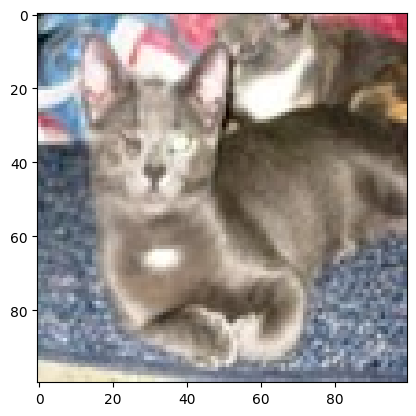

Kocheng


In [9]:
i = random.randint(0, len(x_test))
plt.imshow(x_test[i])
plt.show()

y_pred = model.predict(x_test[i,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    print("Guguk")
else:
    print("Kocheng")